In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import numpy as np
import statistics as sts
import math

#read the data
total_cases = pd.read_csv('https://covid.ourworldindata.org/data/total_cases.csv')
total_deaths = pd.read_csv('https://covid.ourworldindata.org/data/total_deaths.csv')
daily_cases = pd.read_csv('https://covid.ourworldindata.org/data/new_cases.csv')
daily_deaths = pd.read_csv('https://covid.ourworldindata.org/data/new_deaths.csv')
full_set = pd.read_csv('https://covid.ourworldindata.org/data/full_data.csv')
amount_of_tests = pd.read_csv('covid-19-tests-country.csv')
tests_per_million = pd.read_csv('covid19-tests-per-million-people.csv')

full_set = full_set.fillna(0)
full_set['date'] = pd.to_datetime(full_set['date'])

#make list of all locations in the data
all_locations = list(set(full_set['location']))
full_set['est_total_cases'] = full_set['total_deaths'] * 100
full_set.sort_values('date').head()

date     location  new_cases  new_deaths  total_cases  \
1994 2020-01-21  South Korea        0.0         0.0            1   
1318 2020-01-21        Japan        0.0         0.0            1   
2489 2020-01-21     Thailand        0.0         0.0            2   
498  2020-01-21        China        0.0         0.0          278   
2810 2020-01-21        World        0.0         0.0          282   

      total_deaths  est_total_cases  
1994           0.0              0.0  
1318           0.0              0.0  
2489           0.0              0.0  
498            6.0            600.0  
2810           6.0            600.0

In [2]:
full_set.loc[full_set['location'] == 'Netherlands']

date     location  new_cases  new_deaths  total_cases  \
1716 2020-02-28  Netherlands        0.0         0.0            1   
1717 2020-02-29  Netherlands        1.0         0.0            2   
1718 2020-03-01  Netherlands        5.0         0.0            7   
1719 2020-03-02  Netherlands        6.0         0.0           13   
1720 2020-03-03  Netherlands        5.0         0.0           18   
1721 2020-03-04  Netherlands       10.0         0.0           28   
1722 2020-03-05  Netherlands       10.0         0.0           38   
1723 2020-03-06  Netherlands       44.0         0.0           82   
1724 2020-03-07  Netherlands       46.0         0.0          128   
1725 2020-03-08  Netherlands       60.0         0.0          188   
1726 2020-03-09  Netherlands       77.0         2.0          265   
1727 2020-03-10  Netherlands       56.0         0.0          321   
1728 2020-03-11  Netherlands       61.0         1.0          382   
1729 2020-03-12  Netherlands      121.0         1.0          503   
1730 2020-03-13  Netherlands      111.0         0.0          614   
1731 2020-03-14  Netherlands      190.0         5.0          804   
1732 2020-03-15  Netherlands      155.0         2.0          959   
1733 2020-03-16  Netherlands      176.0         8.0         1135   
1734 2020-03-17  Netherlands      278.0         4.0         1413   

      total_deaths  est_total_cases  
1716           0.0              0.0  
1717           0.0              0.0  
1718           0.0              0.0  
1719           0.0              0.0  
1720           0.0              0.0  
1721           0.0              0.0  
1722           0.0              0.0  
1723           0.0              0.0  
1724           1.0            100.0  
1725           1.0            100.0  
1726           3.0            300.0  
1727           3.0            300.0  
1728           4.0            400.0  
1729           5.0            500.0  
1730           5.0            500.0  
1731          10.0           1000.0  
1732          12.0           1200.0  
1733          20.0           2000.0  
1734          24.0           2400.0

In [3]:
df.head()

NameError: name 'df' is not defined

In [4]:
# get all dates since start of incident from anouther datasource
start = datetime.date(2020, 1, 22)     #first known cases on 22-01-2020
today_date = datetime.date.today()
numdays = (today_date - start).days
all_dates = sorted([(today_date - datetime.timedelta(days=x)) for x in range(numdays+1)])
all_dates = [item.__format__('%m-%d-%Y') for item in all_dates]


#read the data

url_base = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'

date_dict = {}
for date in all_dates[:-1]:
    date_dict[date] = {}
    url = url_base + date + '.csv'
    df = pd.read_csv(url)
    df = df.fillna(0)
    try:
        available_countries = set(df['Country/Region'])
        for item in available_countries:
            date_dict[date][item] = {'infected': sum((df.loc[df['Country/Region'] == item]['Confirmed']).values),
                            'deaths': sum((df.loc[df['Country/Region'] == item]['Deaths']).values),
                            'recovered': sum((df.loc[df['Country/Region'] == item]['Recovered']).values),
                           }
    except:
        available_countries = set(df['Country_Region'])
        for item in available_countries:
            date_dict[date][item] = {'infected': sum((df.loc[df['Country_Region'] == item]['Confirmed']).values),
                            'deaths': sum((df.loc[df['Country_Region'] == item]['Deaths']).values),
                            'recovered': sum((df.loc[df['Country_Region'] == item]['Recovered']).values),
                           }
    
df.head()

FIPS     Admin2  Province_State Country_Region          Last_Update  \
0  45001.0  Abbeville  South Carolina             US  2020-03-28 23:05:37   
1  22001.0     Acadia       Louisiana             US  2020-03-28 23:05:37   
2  51001.0   Accomack        Virginia             US  2020-03-28 23:05:37   
3  16001.0        Ada           Idaho             US  2020-03-28 23:05:37   
4  19001.0      Adair            Iowa             US  2020-03-28 23:05:37   

         Lat       Long_  Confirmed  Deaths  Recovered  Active  \
0  34.223334  -82.461707          3       0          0       0   
1  30.295065  -92.414197          9       1          0       0   
2  37.767072  -75.632346          2       0          0       0   
3  43.452658 -116.241552         76       0          0       0   
4  41.330756  -94.471059          1       0          0       0   

                    Combined_Key  
0  Abbeville, South Carolina, US  
1          Acadia, Louisiana, US  
2         Accomack, Virginia, US  
3                 Ada, Idaho, US  
4                Adair, Iowa, US

In [5]:
# Return a dataFrame for a given country
country = 'Netherlands'
pre_df = []
for date in all_dates:
    try:
        pre_df.append([date, country, 
                       date_dict[date][country]['infected'], 
                        date_dict[date][country]['deaths'], 
                         date_dict[date][country]['recovered']])
    except:
        pass
country_df = pd.DataFrame(pre_df, columns=['date','country', 'infected', 'deaths', 'recovered'])
country_df['delta_recover'] = [0]+[country_df['recovered'][x+1] - country_df['recovered'][x] for x in range(len(country_df['recovered'])-1)]
country_df

date      country  infected  deaths  recovered  delta_recover
0   02-27-2020  Netherlands         1       0          0              0
1   02-28-2020  Netherlands         1       0          0              0
2   02-29-2020  Netherlands         6       0          0              0
3   03-01-2020  Netherlands        10       0          0              0
4   03-02-2020  Netherlands        18       0          0              0
5   03-03-2020  Netherlands        24       0          0              0
6   03-04-2020  Netherlands        38       0          0              0
7   03-05-2020  Netherlands        82       0          0              0
8   03-06-2020  Netherlands       128       1          0              0
9   03-07-2020  Netherlands       188       1          0              0
10  03-08-2020  Netherlands       265       3          0              0
11  03-09-2020  Netherlands       321       3          0              0
12  03-10-2020  Netherlands       382       4          0              0
13  03-11-2020  Netherlands       503       5          0              0
14  03-12-2020  Netherlands       503       5          0              0
15  03-13-2020  Netherlands       804      10          0              0
16  03-14-2020  Netherlands       959      12          2              2
17  03-15-2020  Netherlands      1135      20          2              0
18  03-16-2020  Netherlands      1414      24          2              0
19  03-17-2020  Netherlands      1708      43          2              0
20  03-18-2020  Netherlands      2056      58          2              0
21  03-19-2020  Netherlands      2465      77          2              0
22  03-20-2020  Netherlands      3003     107          2              0
23  03-21-2020  Netherlands      3640     137          2              0
24  03-22-2020  Netherlands      4217     180          3              1
25  03-23-2020  Netherlands      4764     214          3              0
26  03-24-2020  Netherlands      5580     277          3              0
27  03-25-2020  Netherlands      6438     357          4              1
28  03-26-2020  Netherlands      7468     435          6              2
29  03-27-2020  Netherlands      8647     547          6              0
30  03-28-2020  Netherlands      9819     640          6              0

In [6]:
### Functions used

## Function to add the growth_rate for a given city
def growt_rate(dataframe, city):
    '''Function to build dataframe for a given city, adding growth rate'''
    # Add a growth rate for a country
    df_GR = dataframe.loc[dataframe['location']== city]
    df_GR = df_GR.loc[df_GR['total_cases'] >= 5]
    df_GR = df_GR.reset_index()

    # calculate GR
    SK_GR =[0.0] + [(df_GR['new_cases'][i+1] /df_GR['new_cases'][i]) for i in range(len(df_GR)-1)]
    df_GR['GR'] = SK_GR

    #replace inf and NaN with 0
    df_GR = df_GR.replace([np.inf, -np.inf], np.nan)
    df_GR = df_GR.replace(np.NaN,0)
    return df_GR

def growt_rate2(dataframe, city):
    '''Function to build dataframe for a given city, adding growth rate'''
    # Add a growth rate for a country
    df_GR = dataframe.loc[dataframe['location']== city]
    df_GR = df_GR.loc[df_GR['total_cases'] >= 5]
    df_GR = df_GR.reset_index()

    # calculate GR
    #SK_GR =[0.0] + [(df_GR['new_cases'][i+1] /df_GR['new_cases'][i]) for i in range(len(df_GR)-1)]
    df_GR['GR'] = df_GR['new_cases'] / df_GR['total_cases']

    #replace inf and NaN with 0
    df_GR = df_GR.replace([np.inf, -np.inf], np.nan)
    df_GR = df_GR.replace(np.NaN,0)
    return df_GR

#test function
#df_growthrate = growt_rate(full_set, 'Netherlands' )
#df_growthrate.head()

## Function to plot total cases
def plot_total_cases(country_list, title, height = 15):
    """Function to plot the given countries total cases over time, takes an list of countries as input"""
    plt.figure(figsize=(20,height))
    for item in country_list:
        x = full_set.loc[full_set['location']== item]['date']
        y = full_set.loc[full_set['location']== item]['total_cases']
        y1 = full_set.loc[full_set['location']== item]['est_total_cases']
        plt.plot(x,y, label='reported cases: {}'.format(item))
        plt.plot(x,y1, label='estimated cases: {}'.format(item))

    plt.ylabel("Amount of infections")
    plt.xlabel('Date range')
    plt.title(title)
    plt.xticks(rotation = 90)
    plt.legend()
    plt.show()
    
#test_list = ['Netherlands', 'Italy']
#plot_total_cases(test_list, 'total cases for italy vs nl')

## Function to plot new cases
def plot_new_cases(country_list, title, start = 0, height=10, width=20):
    """Function to plot the given countries total cases over time, takes an list of countries as input"""
    plt.figure(figsize=(width,height))
    for item in country_list:
        x = full_set.loc[full_set['location']== item]['date'][start:]
        y = full_set.loc[full_set['location']== item]['new_cases'][start:]
        plt.plot(x,y, label=item)

    plt.ylabel("Amount of new cases")
    plt.xlabel('Date range')
    plt.title(title)
    plt.xticks(rotation = 90)
    plt.legend()
    plt.show()

#Function to plot deaths per country
def plot_death_cases(country_list, title, start = 0, height=10, width=20):
    """Function to plot the given countries total cases over time, takes an list of countries as input"""
    plt.figure(figsize=(width,height))
    for item in country_list:
        x = full_set.loc[full_set['location']== item]['date'][start:]
        y = full_set.loc[full_set['location']== item]['total_deaths'][start:]
        plt.plot(x,y, label=item)

    plt.ylabel("Amount of deaths")
    plt.xlabel('Date range')
    plt.title(title)
    plt.xticks(rotation = 90)
    plt.legend()
    plt.show()

def death_rate(dataframe, city):
    '''Function to build dataframe for a given city, adding growth rate'''
    # Add a growth rate for a country
    df_dr = dataframe.loc[dataframe['location']== city]
    #df_dr = df_GR.loc[df_GR['total_cases'] >= 5]
    df_dr = df_dr.reset_index()

    # calculate DR
    deathrate = [(df_dr['total_deaths'][i] /df_dr['total_cases'][i]) for i in range(len(df_dr))]
    df_dr['DR'] = deathrate

    #replace inf and NaN with 0
    #df_GR = df_GR.replace([np.inf, -np.inf], np.nan)
    #df_GR = df_GR.replace(np.NaN,0)
    df_dr = df_dr.loc[df_dr['DR'] < 1]
    return df_dr

#test_list = ['Netherlands', 'Italy']
#plot_new_cases(test_list, 'new cases over time for NL and IT')
#death_rate(full_set, 'Netherlands').head()


# Return a dataFrame for a given country
def dataframe_from_dict(country):
    pre_df = []
    for date in all_dates:
        try:
            pre_df.append([date, country, 
                           date_dict[date][country]['infected'], 
                            date_dict[date][country]['deaths'], 
                             date_dict[date][country]['recovered']])
        except:
            pass
    country_df = pd.DataFrame(pre_df, columns=['date','country', 'infected', 'deaths', 'recovered'])
    country_df['delta_recover'] = [0]+[country_df['recovered'][x+1] - country_df['recovered'][x] for x in range(len(country_df['recovered'])-1)]
    return country_df

#test the function
dataframe_from_dict('').head()

date country infected deaths recovered  delta_recover
0  NaN     NaN      NaN    NaN       NaN              0

In [7]:
full_set

date     location  new_cases  new_deaths  total_cases  \
0    2020-02-25  Afghanistan        0.0         0.0            1   
1    2020-02-26  Afghanistan        0.0         0.0            1   
2    2020-02-27  Afghanistan        0.0         0.0            1   
3    2020-02-28  Afghanistan        0.0         0.0            1   
4    2020-02-29  Afghanistan        0.0         0.0            1   
5    2020-03-01  Afghanistan        0.0         0.0            1   
6    2020-03-02  Afghanistan        0.0         0.0            1   
7    2020-03-03  Afghanistan        0.0         0.0            1   
8    2020-03-04  Afghanistan        0.0         0.0            1   
9    2020-03-05  Afghanistan        0.0         0.0            1   
10   2020-03-06  Afghanistan        0.0         0.0            1   
11   2020-03-07  Afghanistan        0.0         0.0            1   
12   2020-03-08  Afghanistan        3.0         0.0            4   
13   2020-03-09  Afghanistan        0.0         0.0            4   
14   2020-03-10  Afghanistan        0.0         0.0            4   
15   2020-03-11  Afghanistan        0.0         0.0            4   
16   2020-03-12  Afghanistan        3.0         0.0            7   
17   2020-03-13  Afghanistan        0.0         0.0            7   
18   2020-03-14  Afghanistan        0.0         0.0            7   
19   2020-03-15  Afghanistan        3.0         0.0           10   
20   2020-03-16  Afghanistan        6.0         0.0           16   
21   2020-03-17  Afghanistan        5.0         0.0           21   
22   2020-03-09      Albania        0.0         0.0            2   
23   2020-03-10      Albania        0.0         0.0            2   
24   2020-03-11      Albania        8.0         0.0           10   
25   2020-03-12      Albania        0.0         0.0           10   
26   2020-03-13      Albania       13.0         0.0           23   
27   2020-03-14      Albania       10.0         0.0           33   
28   2020-03-15      Albania        5.0         0.0           38   
29   2020-03-16      Albania        4.0         0.0           42   
...         ...          ...        ...         ...          ...   
2837 2020-02-17        World    19572.0       106.0        71429   
2838 2020-02-18        World     1903.0        98.0        73332   
2839 2020-02-19        World     1872.0       136.0        75204   
2840 2020-02-20        World      542.0       115.0        75748   
2841 2020-02-21        World     1021.0       118.0        76769   
2842 2020-02-22        World     1023.0       112.0        77794   
2843 2020-02-23        World     1017.0       102.0        78811   
2844 2020-02-24        World      517.0       155.0        79331   
2845 2020-02-25        World      896.0        82.0        80239   
2846 2020-02-26        World      864.0        62.0        81109   
2847 2020-02-27        World     1175.0        42.0        82294   
2848 2020-02-28        World     1353.0        54.0        83652   
2849 2020-02-29        World     1748.0        66.0        85403   
2850 2020-03-01        World     1727.0        53.0        87137   
2851 2020-03-02        World     1801.0        64.0        88948   
2852 2020-03-03        World     1912.0        67.0        90869   
2853 2020-03-04        World     2217.0        86.0        93090   
2854 2020-03-05        World     2220.0        79.0        95324   
2855 2020-03-06        World     2864.0        99.0        98192   
2856 2020-03-07        World     3730.0       104.0       101927   
2857 2020-03-08        World     3644.0        96.0       105592   
2858 2020-03-09        World     3979.0       224.0       109577   
2859 2020-03-10        World     4119.0       201.0       113702   
2860 2020-03-11        World     4611.0       275.0       118319   
2861 2020-03-12        World     6936.0       317.0       125260   
2862 2020-03-13        World     7488.0       338.0       132758   
2863 2020-03-14        World     9761.0       433.0       142534   

# Calculate Growth Rate
The growth rate for countries with more then 50 cases is calculated. We start looking from a moment when there are more then 5 cases know in a country.

In [8]:
# Make a list with cities with more total_cases then threshold
threshold = 50
more_then = full_set.loc[full_set['date']== '2020-03-16']
more_then = more_then.loc[full_set['total_cases'] >= threshold]
more_then_c_list = list(more_then['location'])
more_then_c_list.remove('International')
more_then_c_list.remove('World')

#Calculate the growth_rates, build a model
growth_rates = []
for country in more_then_c_list:
    # Add a growth rate for a country
    
    
    growth_rates.append([country, growt_rate2(full_set, country)['GR'].mean()])
    
df = pd.DataFrame.from_records(growth_rates)
df = df.dropna()
df.to_csv('test.csv')   #write to csv for further processing of the visualization.
df = df.sort_values(1)

C:\Users\s165635\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


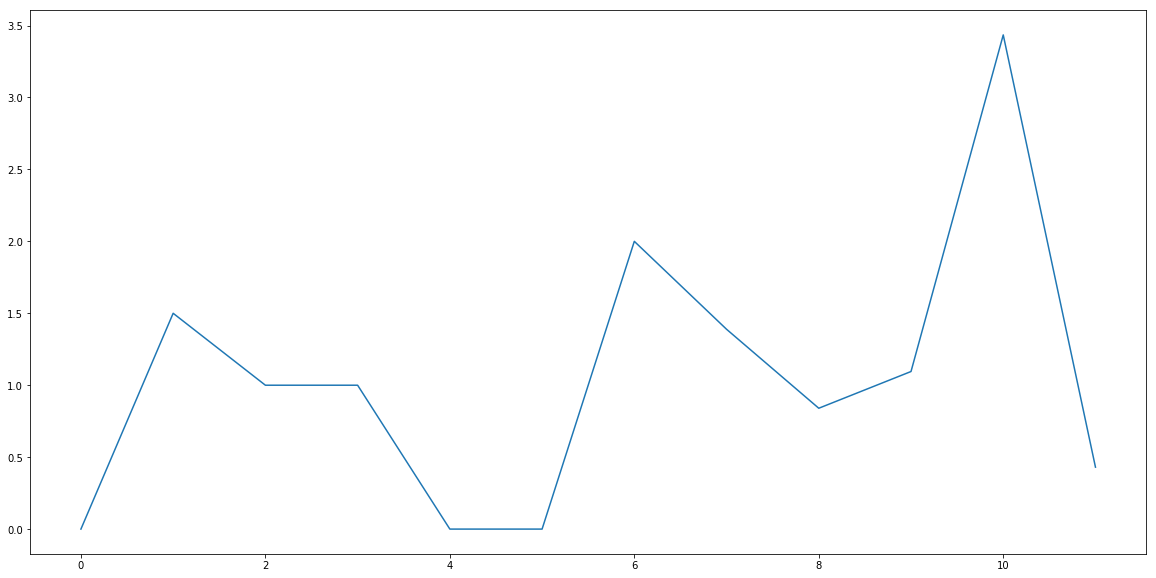

In [9]:
Growth_rate_plt = growt_rate(full_set, 'Brazil')['GR']
plt.figure(figsize=(20,10))
plt.plot(Growth_rate_plt)
plt.show()

In [10]:
df

0         1
52              Thailand  0.056685
56               Vietnam  0.061826
54  United Arab Emirates  0.062062
45             Singapore  0.074402
1              Australia  0.081752
30              Malaysia  0.085272
10                 China  0.085734
8                 Canada  0.097412
27                 Japan  0.097658
55         United States  0.114784
3                Bahrain  0.117333
28                Kuwait  0.123038
16                France  0.126727
17               Germany  0.129146
40           South Korea  0.131815
53        United Kingdom  0.140292
31                Mexico  0.153963
23                  Iraq  0.172077
34              Pakistan  0.178710
29               Lebanon  0.180989
20                 India  0.184292
43            San Marino  0.200847
25                Israel  0.202227
39                 Qatar  0.203084
13                 Egypt  0.203441
18                Greece  0.204776
42                Russia  0.206658
19               Iceland  0.211120
14               Estonia  0.216441
15               Finland  0.222320
44          Saudi Arabia  0.239327
41               Romania  0.241785
7               Bulgaria  0.244153
0              Argentina  0.248183
50                Sweden  0.254488
33                Norway  0.255459
2                Austria  0.257870
36           Philippines  0.259772
26                 Italy  0.265067
22                  Iran  0.267297
24               Ireland  0.270396
12               Denmark  0.272362
11        Czech Republic  0.272464
38              Portugal  0.279235
48          South Africa  0.281652
46              Slovakia  0.284352
5                 Brazil  0.289080
51           Switzerland  0.295231
32           Netherlands  0.299107
4                Belgium  0.300507
35                  Peru  0.306061
21             Indonesia  0.309033
49                 Spain  0.309091
47              Slovenia  0.314293
37                Poland  0.320571
9                  Chile  0.323955
6                 Brunei  0.335278

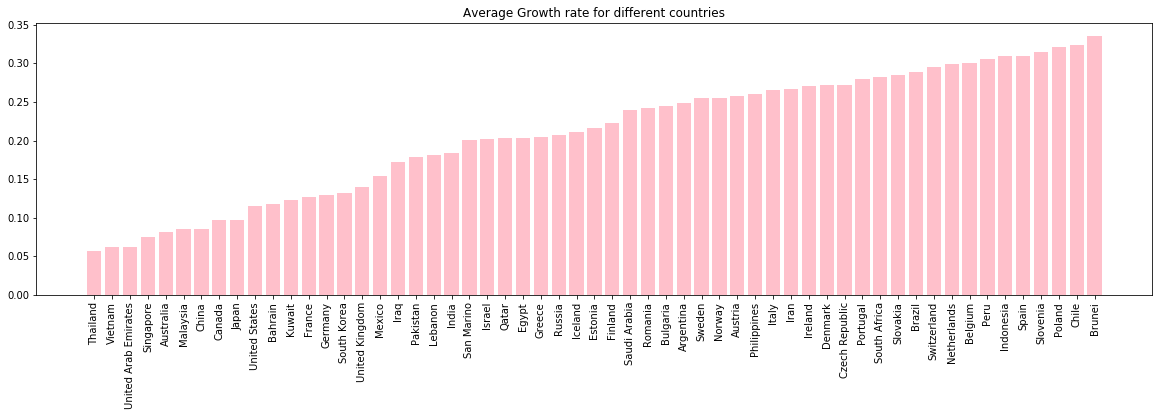

In [11]:
# Plot a bar-chart with growth-rate
plt.figure(figsize=(20,5))
plt.bar(df[0], df[1], width=0.8, color='pink')

plt.title('Average Growth rate for different countries')
plt.xticks(rotation = 90)
plt.show()

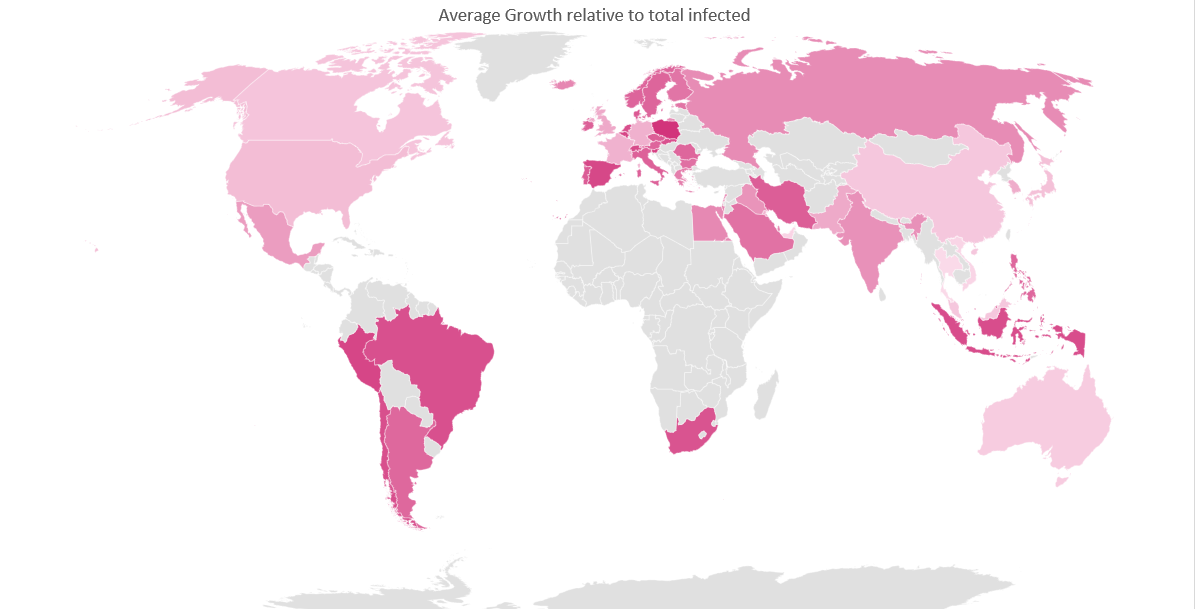

C:\Users\s165635\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


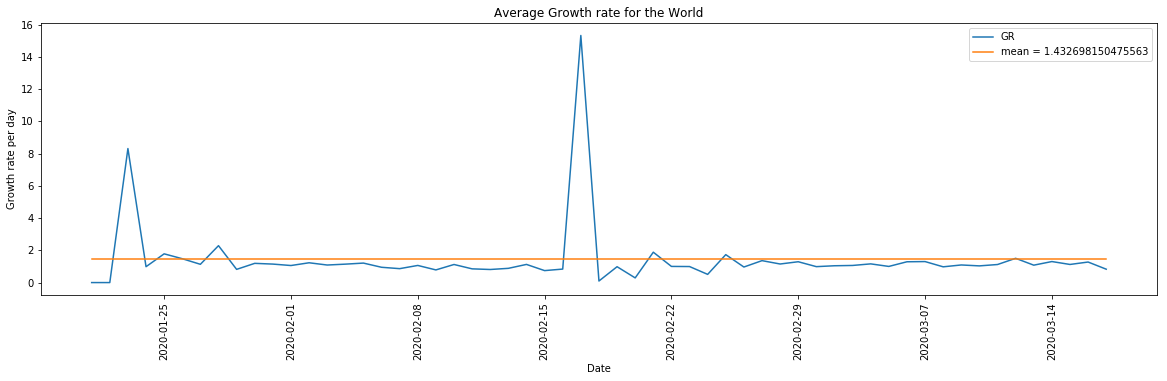

In [12]:
# plot the development of the growtrate for the world:

plt.figure(figsize=(20,5))
plt.plot(growt_rate(full_set, 'World')['date'], growt_rate(full_set, 'World')['GR'])
ymean = [growt_rate(full_set, 'World')['GR'].mean() for date in range(len(growt_rate(full_set, 'World')['date']))]
plt.plot(growt_rate(full_set, 'World')['date'], ymean, label='mean = {}'.format(ymean[0]))

plt.ylabel("Growth rate per day")
plt.xlabel('Date')
plt.title('Average Growth rate for the World')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

C:\Users\s165635\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


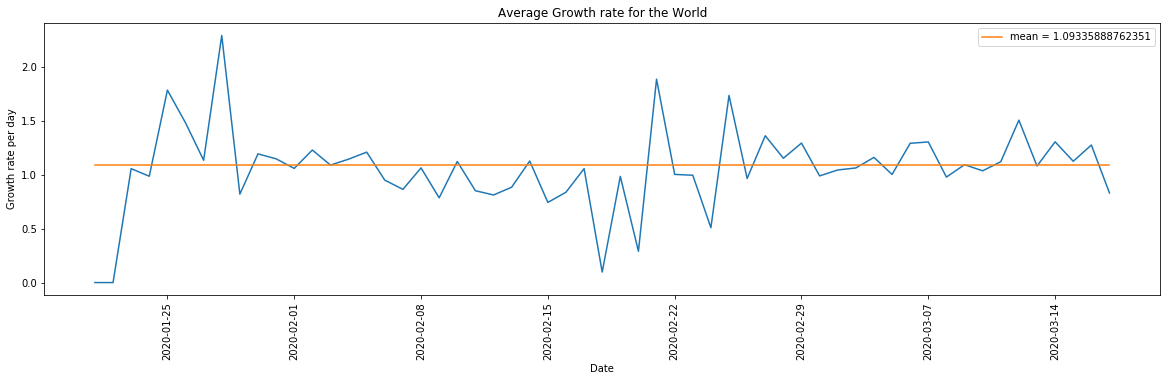

In [13]:
# Now without the exponential growth outliers (x8 in the beginning, x15 when spread to the rest of the world)
growt_rate(full_set, 'World')

plt.figure(figsize=(20,5))
ygr = [x if x < 4 else sts.mean([x for x in growt_rate(full_set, 'World')['GR'] if x <4]) for x in growt_rate(full_set, 'World')['GR']]
plt.plot(growt_rate(full_set, 'World')['date'], ygr)
ymean = [sts.mean(ygr[2:]) for date in range(len(growt_rate(full_set, 'World')['date']))]
plt.plot(growt_rate(full_set, 'World')['date'], ymean, label='mean = {}'.format(ymean[0]))

plt.ylabel("Growth rate per day")
plt.xlabel('Date')
plt.title('Average Growth rate for the World')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

# Plot the total cases in the world
We plot the cases that have more then 50 infections in total

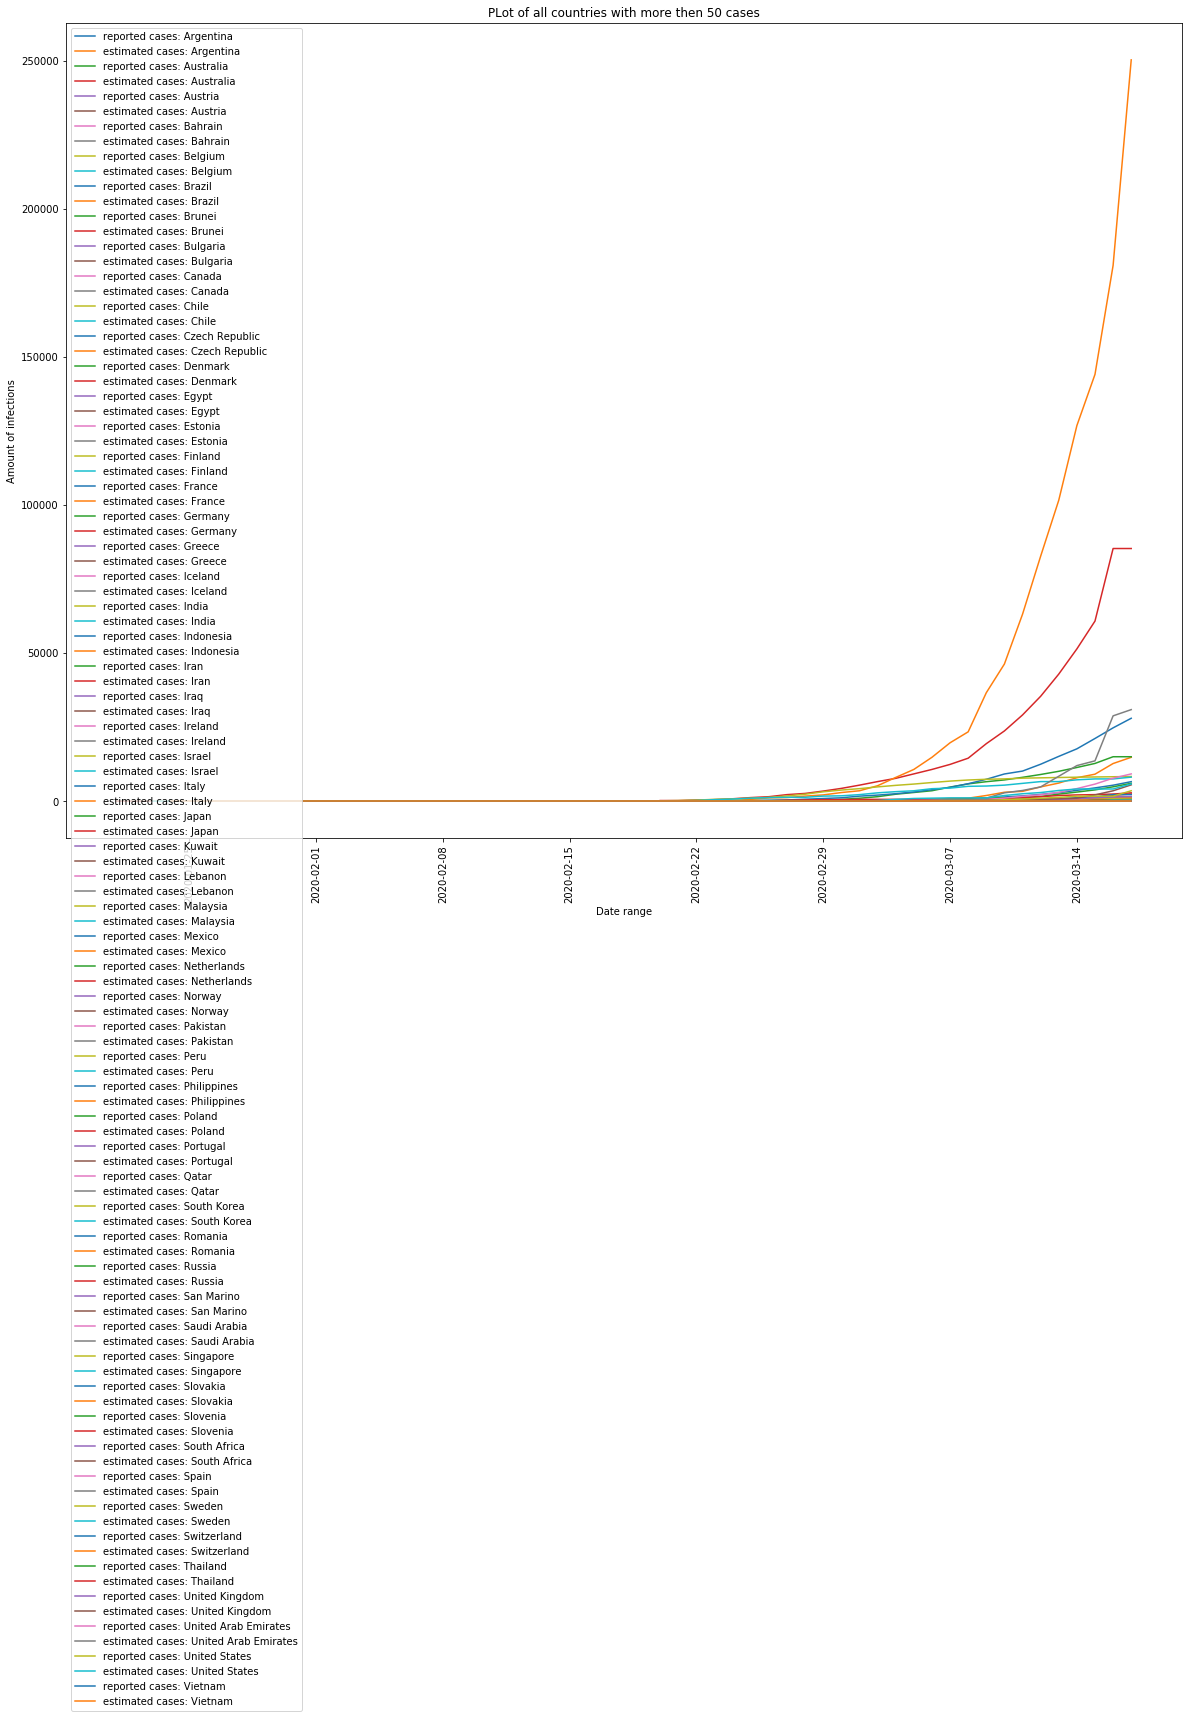

In [14]:
# plot dutch cases against Italian cases
more_then_c_list.remove('China')
plot_total_cases(more_then_c_list, 'PLot of all countries with more then 50 cases')

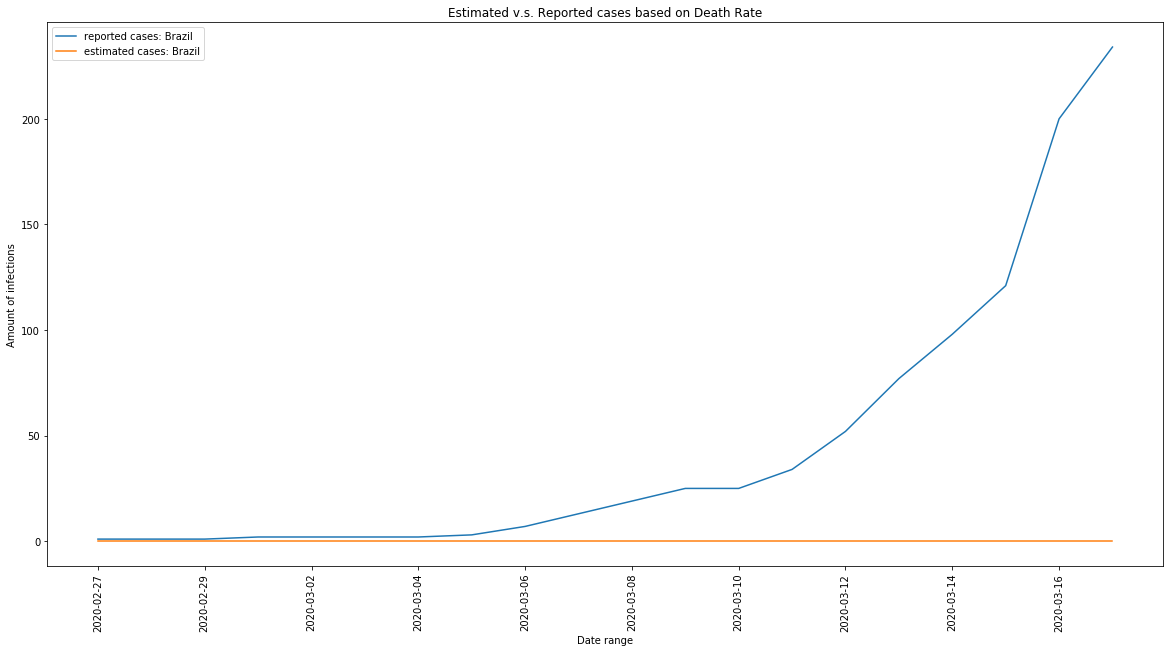

In [15]:
# plot dutch cases against Italian cases
country_list = ['Brazil']
plot_total_cases(country_list, 'Estimated v.s. Reported cases based on Death Rate', 10)

In [16]:
#lets make it more interactive with plotly
import plotly.graph_objects as go
traces_list = []
for item in more_then_c_list:
    x = full_set.loc[full_set['location'] == item]['date']

    trace = go.Scatter(x=x,
            y=full_set.loc[full_set['location'] == item]['total_cases'],
            name = item,
            )
    traces_list.append(trace)

Layout = go.Layout(xaxis=dict(showgrid=True, zeroline=True, showticklabels=True),
                   yaxis=dict(showgrid=True, zeroline=True, showticklabels=True),
                   xaxis_title="Days since outbreak",
                   yaxis_title="Amount of infected",
                    )

fig = go.Figure(data=traces_list, layout=Layout)
fig

# Lets look at new cases only
look at how the new cases are evolving over time, is there a logistic relation?

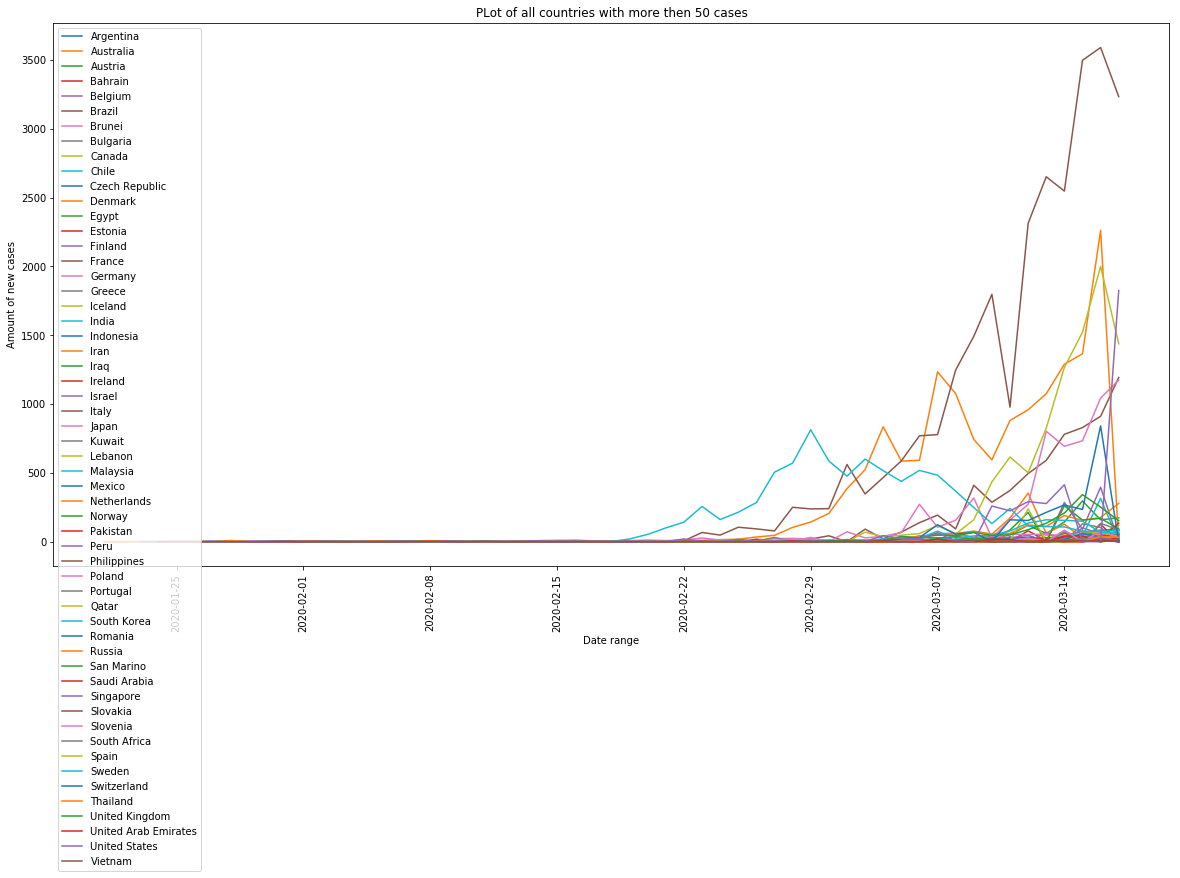

In [17]:
plot_new_cases(more_then_c_list, 'PLot of all countries with more then 50 cases')

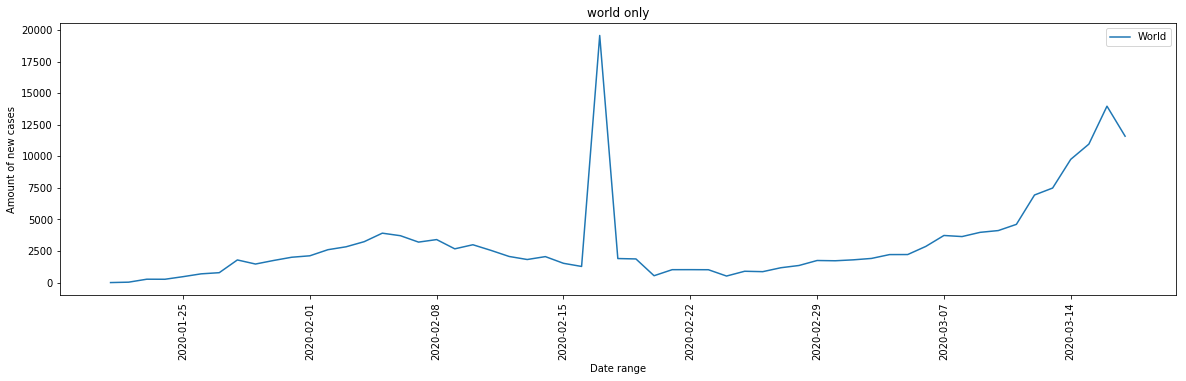

In [18]:
plot_new_cases(['World'], 'world only', height=5)

# look at Deaths per country
analysis on the amount of deaths per country

In [19]:
#First define a list with countries with reported deaths
c_with_deaths = list(set(full_set.loc[full_set['total_deaths'] > 1]['location']))
c_with_deaths.remove('International')
c_with_deaths.remove('World')
#c_with_deaths.remove('China')

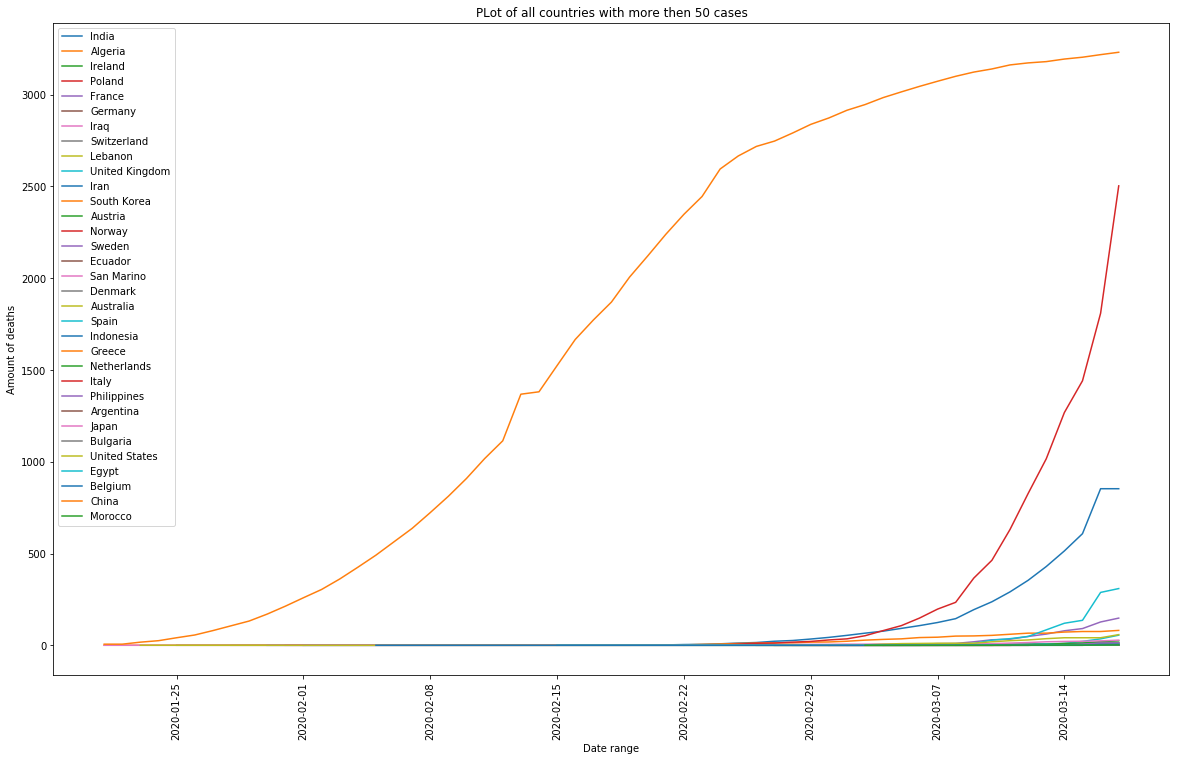

In [20]:
plot_death_cases(c_with_deaths, 'PLot of all countries with more then 50 cases', height = 12)

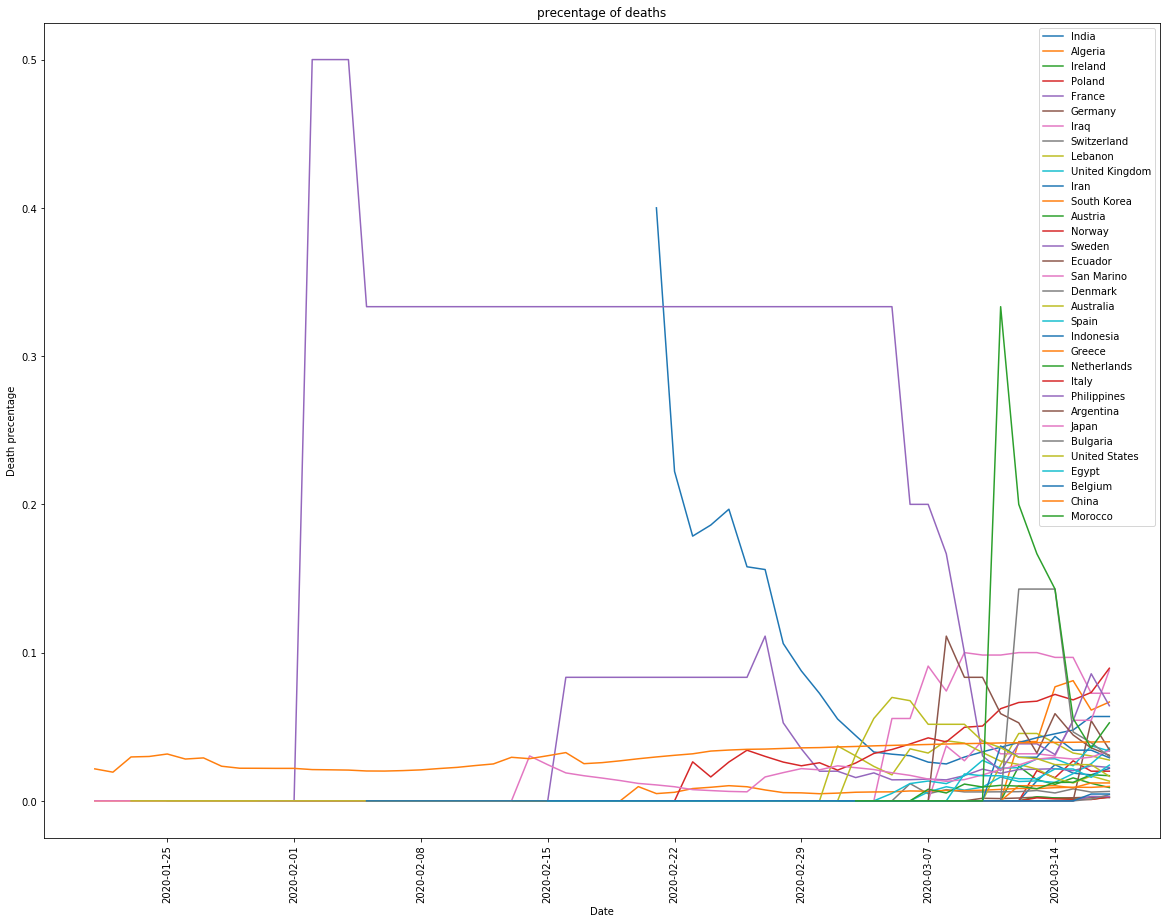

In [21]:
# deaths compared to infected (percentage)
plt.figure(figsize=(20,15))
stats = []
for country in c_with_deaths:
    plt.plot(death_rate(full_set, country)['date'], death_rate(full_set, country)['DR'], label=country)
    current =  death_rate(full_set, country)['DR'][-1:].values[0]
    mean_d = death_rate(full_set, country)['DR'].mean()
    median_d = death_rate(full_set, country)['DR'].median()
    max_d = death_rate(full_set, country)['DR'].max()
    min_d = death_rate(full_set, country)['DR'].min()
    std_d = death_rate(full_set, country)['DR'].std()
    stats.append([country, current, mean_d, max_d, min_d, std_d])
plt.ylabel("Death precentage")
plt.xlabel('Date')
plt.title('precentage of deaths')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

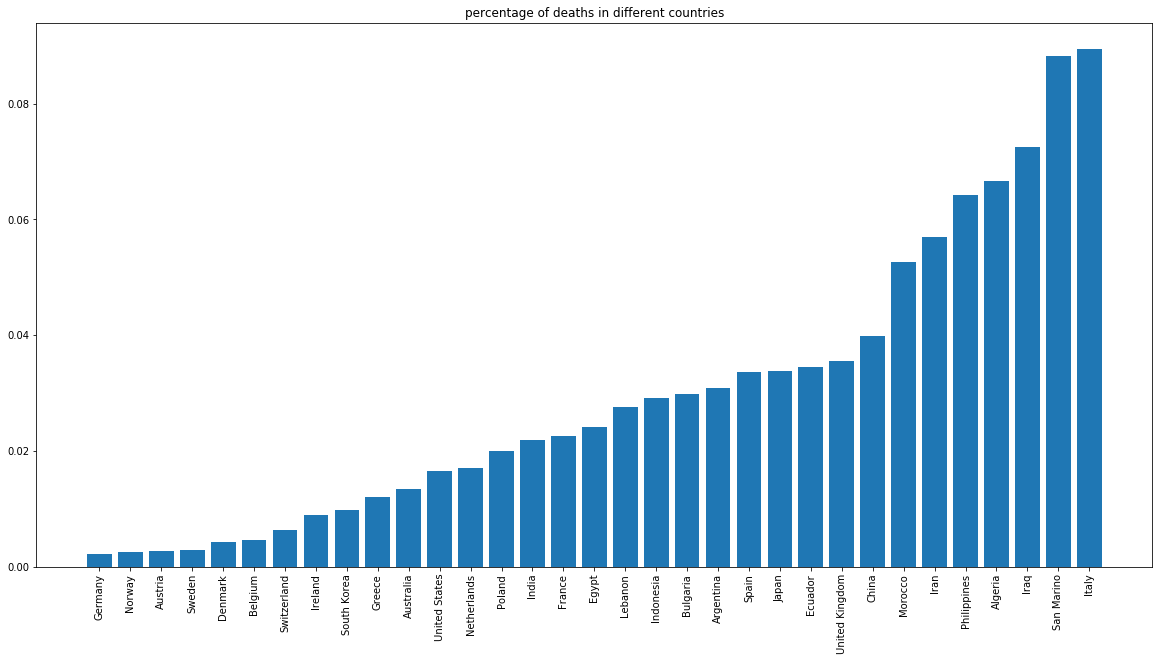

In [22]:
# Plot a Bar chart with the death rates
df = pd.DataFrame.from_records(stats)
#df.to_csv('test.csv')   #write to csv for further processing of the visualization.
df = df.sort_values(1)

# Plot a bar-chart with growth-rate
plt.figure(figsize=(20,10))
plt.bar(df[0], df[1], width=0.8)

plt.title('percentage of deaths in different countries')
plt.xticks(rotation = 90)
plt.show()

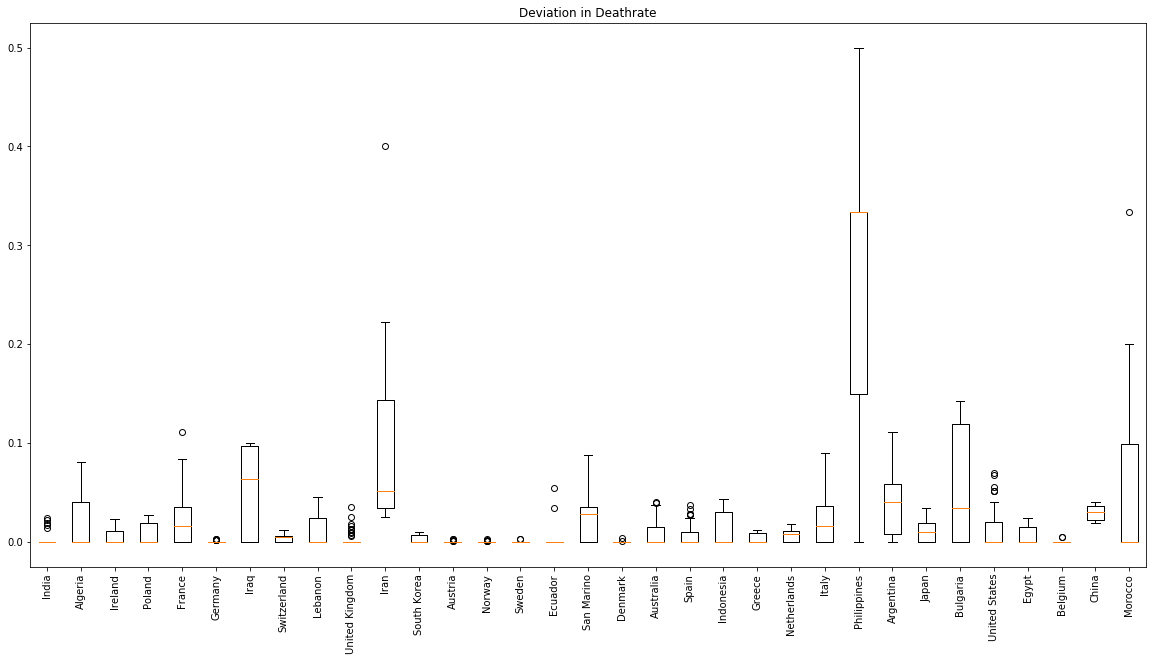

In [23]:
#fig = plt.figure(figsize=(20,10))
data = []
for country in c_with_deaths:
    data.append(death_rate(full_set, country)['DR'])
fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.boxplot(data)
bp = ax1.set_xticklabels(c_with_deaths, rotation=90)
plt.title('Deviation in Deathrate')
plt.show()

# Forecast 
Done with a simple sigmoid function-linefit

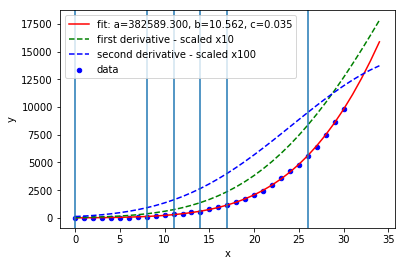

In [24]:
from sklearn import linear_model
import time
import datetime
import pylab as plt
from scipy.optimize import curve_fit
from numpy.random import randint
date_format = "%Y-%m-%d"

#parameters to define
item = 'Netherlands'
start = 0
x_shift = 13
today = 2994
halfwaypoint = 4000


# Return a dataFrame for a given country
country = item
pre_df = []
for date in all_dates:
    try:
        pre_df.append([date, country, 
                       date_dict[date][country]['infected'], 
                        date_dict[date][country]['deaths'], 
                         date_dict[date][country]['recovered']])
    except:
        pass
country_df = pd.DataFrame(pre_df, columns=['date','country', 'infected', 'deaths', 'recovered'])
country_df['delta_recover'] = [0]+[country_df['recovered'][x+1] - country_df['recovered'][x] for x in range(len(country_df['recovered'])-1)]
country_df['date'] = pd.to_datetime(country_df['date'])




GR_mean = [growt_rate(full_set, 'Netherlands')['GR'].mean() for date in range(len(growt_rate(full_set, 'Netherlands')['date']))]
GR_mean = np.mean(GR_mean)

# Aantallen zijn moeilijk te voorspellen, maar de dynamiek is wel goed te zien. Afgeleiden zijn wel redelijk nauwkeurig.
# De tweede afgeleide is de aanzwelling (gas intrappen maar nog geen versnelling). Als je achter raakt op de acceleratie en
# aanzwelling dan heb je dus een probleem (dan blijft je curve toenemen).

def gompertz(x,a,b,c): # c is growth rate // b is displacement along x-axis // a is asymptote
    return a*np.exp(-b*np.exp(-c*x))

def gompertz_der1(x,a,b,c): # scaled x10
    return 10*(a*b*c*np.exp( b*(-np.exp(-c*x))-c*x ) )


def gompertz_der2(x,a,b,c): 
    return 100*(-a*b*(c**2)*np.exp(b*(-np.exp(-c*x))-2*c*x)*(np.exp(c*x)-b))

# xmax = ln(b)/c

# convert the list of dates to a list of numeric values (x)
xd = country_df['date']
xd = [datetime.datetime.strptime(str(date)[:-9], date_format) for date in xd]
x = [(date-xd[0]).days for date in xd]

# create a list of all measures taken and on what date they took effect (measures_NL['type'] and measures_NL['date'] / x_events)
column_names = ['date','type']
dates_series = pd.DataFrame(['2020-02-27', '2020-03-06', '2020-03-09', '2020-03-12', '2020-03-15','2020-03-24'], columns = ['date'])
measures_series = pd.DataFrame(['patient-0','Noord-Brabant stay home with symptoms','no more handshakes','Nation-wide: stay at home if possible / events are cancelled', 'Closing of schools, restaurants, sports facilities etc.','ticketing of grouping / all events cancelled'], columns= ['type'])
measures_NL = pd.concat([dates_series, measures_series], axis =1)
measures_NL['new_date'] = [datetime.datetime.strptime((date), date_format)  for date in measures_NL['date']]
measures_NL['new_date'] = [(date-measures_NL['new_date'][0]).days for date in measures_NL['new_date']]

x_events = list(measures_NL['new_date'])

# get the actual number of infected per day per country
y = country_df['infected']

# usefull for selecting segments of days
start_date = 0
x = x[start_date:]
y = y[start_date:]

nr_estimations = 5
extra_dates = list(range(x[-1]+1, x[-1]+nr_estimations))

# preprocess into array
x = np.array(x).reshape(-1, 1)
y = np.array(y)
normalized_y = (y-min(y))/(max(y)-min(y))

# create data to be fitted
np.random.seed(1729)
#y_noise = 1 * randint(low = -5, high =5, size=x.size)  # would probably provide a more generalized fit
ydata = y  #+ y_noise

# plot the actual number of infections as scatter points
plt.scatter(x, y,s=20, c='b', label='data')


x= x[:,0] # reduce dimensionality | difference between: x data used to fit curves and x data that is plotted for predictions
plot_x = list(x)+extra_dates
plot_x = np.array(plot_x)

# fit the data with gompertz function
popt1, pcov1 = curve_fit(gompertz, x, ydata) # fit x
plt.plot(plot_x, gompertz(plot_x, *popt1), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt1)) 

plt.plot(plot_x, gompertz_der1(plot_x, *popt1), 'g--', label='first derivative - scaled x10' ) 
plt.plot(plot_x, gompertz_der2(plot_x, *popt1), 'b--', label='second derivative - scaled x100' ) 

if item =='Netherlands':
    for event in x_events:
        plt.axvline(x=event, ymin=0, ymax=6000)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


# Now Let's create some animations

In [125]:
# import the animator
import plotly.express as px
import plotly.graph_objects as go

# now import data just like cell above
#parameters to define
item = 'Netherlands'

# Return a dataFrame for a given country
country = item
pre_df = []
for date in all_dates:
    try:
        pre_df.append([date, country, 
                       date_dict[date][country]['infected'], 
                        date_dict[date][country]['deaths'], 
                         date_dict[date][country]['recovered']])
    except:
        pass
country_df = pd.DataFrame(pre_df, columns=['date','country', 'infected', 'deaths', 'recovered'])
country_df['delta_recover'] = [0]+[country_df['recovered'][x+1] - country_df['recovered'][x] for x in range(len(country_df['recovered'])-1)]
country_df['date'] = pd.to_datetime(country_df['date'])

# for China
#country_df.drop(country_df.tail(2).index,inplace=True) # drop last 2 rows


GR_mean = [growt_rate(full_set, item)['GR'].mean() for date in range(len(growt_rate(full_set, item)['date']))]
GR_mean = np.mean(GR_mean)

def gompertz(x,a,b,c): # c is growth rate // b is displacement along x-axis // a is asymptote
    return a*np.exp(-b*np.exp(-c*x))

def gompertz_der1(x,a,b,c): # scaled x10
    return 10*(a*b*c*np.exp( b*(-np.exp(-c*x))-c*x ) )


def gompertz_der2(x,a,b,c): 
    return 100*(-a*b*(c**2)*np.exp(b*(-np.exp(-c*x))-2*c*x)*(np.exp(c*x)-b))


# convert the list of dates to a list of numeric values (x)
xd = country_df['date']
xd = [datetime.datetime.strptime(str(date)[:-9], date_format) for date in xd]
x = [(date-xd[0]).days for date in xd]

country_df['numbered_date'] = x

# usefull for selecting segments of days
start_date = 0
x = x[start_date:]
y = y[start_date:]

nr_estimations = 50
extra_dates = list(range(x[-1]+1, x[-1]+nr_estimations))
x = list(x)+extra_dates

country_df_plot = pd.DataFrame()
country_df_plot['numbered_date']= x

####################################################
## Replace values with weekly mean
#nr_days = 7 # number of days to mean over
#week_mean = pd.DataFrame()
#week_mean['week_mean'] = [country_df['infected'].iloc[index-nr_days:index].mean() for index,row in country_df.iterrows()]
#week_mean = week_mean.fillna(0)
#country_df['infected'] = week_mean
####################################################

a = []
b = []
c = []
# Let's create a loop to calculate all the parameters for the gompertz function
for end_date in range(10, len(x)+1):
    try: # try to estimate parameter values and if not possible then save last found values
        par, pcov = curve_fit(gompertz, country_df['numbered_date'][:end_date], country_df['infected'][:end_date]) 
    except:
        pass
    a.append( par[0] )
    b.append( par[1] )
    c.append( par[2] )

filler = [0]* (len(country_df_plot)-len(a))
a = filler + a
b = filler + b
c = filler + c
country_df_plot['a'] = a
country_df_plot['b'] = b
country_df_plot['c'] = c



plot_df = pd.DataFrame()
plot_df['numbered_date'] = country_df_plot['numbered_date']

for index, row in country_df_plot.iterrows():
    y = gompertz(country_df_plot['numbered_date'], row['a'],row['b'],row['c'])
    y_der1 = gompertz_der1(country_df_plot['numbered_date'], row['a'],row['b'],row['c'])
    y_der2 = gompertz_der2(country_df_plot['numbered_date'], row['a'],row['b'],row['c'])
    
    # create titles
    title1 = 'gom'+'_'+str(int(row['numbered_date']))
    title2 = 'der1'+'_'+str(int(row['numbered_date']))
    title3 = 'der2'+'_'+str(int(row['numbered_date']))
    
    plot_df[title1] = y
    plot_df[title2] = y_der1
    plot_df[title3] = y_der2
    
functions = ['infected','gom', 'der1', 'der2']  
    
# make figure
fig_dict = {
    "data": [],
    "layout": {},
    "frames": []
}

# fill in most of layout
fig_dict["layout"]["xaxis"] = {"range": [0, 70], "title": "Day"}
fig_dict["layout"]["yaxis"] = {"range": [-10, 15000],"title": "Infections"}
fig_dict["layout"]["hovermode"] = "closest"
fig_dict["layout"]["sliders"] = {
    "args": [
        "transition", {
            "duration": 400,
            "easing": "cubic-in-out"
        }
    ],
    "initialValue": str(list(country_df['date'])[0].date()),
    "plotlycommand": "animate",
    "values": country_df['date'],
    "visible": True
}
fig_dict["layout"]["updatemenus"] = [
    {
        "buttons": [
            {
                "args": [None, {"frame": {"duration": 1500, "redraw": False},
                                "fromcurrent": True, "transition": {"duration": 1000,
                                                                    "easing": "quadratic-in-out"}}],
                "label": "Play",
                "method": "animate"
            },
            {
                "args": [[None], {"frame": {"duration": 300, "redraw": False},
                                  "mode": "immediate",
                                  "transition": {"duration": 100}}],
                "label": "Pause",
                "method": "animate"
            }
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }
]

sliders_dict = {
    "active": 0,
    "yanchor": "top",
    "xanchor": "left",
    "currentvalue": {
        "font": {"size": 20},
        "prefix": "Day:",
        "visible": True,
        "xanchor": "right"
    },
    "transition": {"duration": 500, "easing": "cubic-in-out"},
    "pad": {"b": 10, "t": 50},
    "len": 0.9,
    "x": 0.1,
    "y": 0,
    "steps": []
}


# make data
day = str(list(country_df_plot['numbered_date'])[0])
for func in functions:
    if func == 'infected':
        column_name= func
        dataset_by_day_and_function = list(country_df[column_name])
        data_dict = {
            "x": list(country_df["numbered_date"]),
            "y": list(dataset_by_day_and_function),
            "text": [str(k.date()) for k in list(country_df['date'])],
            "mode": "markers",
            "marker": {
                "sizemode": "area",
                "size": 9
            },
            "name": 'true infected'}
    else:
        column_name = func+'_'+day        
        dataset_by_day_and_function = list(plot_df[column_name])

        data_dict = {
            "x": list(plot_df["numbered_date"]),
            "y": list(dataset_by_day_and_function),
            "text": [str(k.date()) for k in list(country_df['date'])],
            "marker": {
                "sizemode": "area"
            },
            "name": func
    }
    fig_dict["data"].append(data_dict)

# make frames
for i,day in enumerate(list(country_df_plot['numbered_date'])): # [8:] SET TO 8 so that plot only shows starting from a date where we can actually fit the curve
    day = str(day)
    frame = {"data": [], "name": str(day)}
    for func in functions:
        if func == 'infected':
            column_name= func
            data_dict = {
            "x": list(country_df["numbered_date"]),
            "y": list(country_df[column_name]),
            "text": [str(k.date()) for k in list(country_df['date'])],
            "mode": "markers",
            "marker": {"size": 9},
            "name": day
            }
        else:
            column_name = func+'_'+day
        
            data_dict = {
                "x": list(plot_df["numbered_date"]),
                "y": list(plot_df[column_name]),
                "text": [str(k.date()) for k in list(country_df['date'])],
                "name": day
            }
        frame["data"].append(data_dict)
#        fig_dict["data"].append(data_dict) # comment out to create animation

        
    fig_dict["frames"].append(frame)
    slider_step = {"args": [
        [day],
        {"frame": {"duration": 5000, "redraw": False},
         "mode": "immediate",
         "transition": {"duration": 10000}}
            ],
        "label": day+' '+'['+str(i)+']',
        "method": "animate"}
    sliders_dict["steps"].append(slider_step)



fig_dict["layout"]["sliders"] = [sliders_dict]

fig = go.Figure(fig_dict)

# create a list of all measures taken and on what date they took effect (measures_NL['type'] and measures_NL['date'] / x_events)
column_names = ['date','type']
dates_series_nl = pd.DataFrame(['2020-02-27', '2020-03-06', '2020-03-09', '2020-03-12', '2020-03-15','2020-03-24'], columns = ['date'])
measures_series_nl = pd.DataFrame(['patient-0','Noord-Brabant stay home with symptoms','no more handshakes','stay at home if possible | large events cancelled', 'Closing of schools, restaurants, sports facilities etc.','ticketing of grouping | all events cancelled'], columns= ['type'])
measures_NL = pd.concat([dates_series_nl, measures_series_nl], axis =1)
measures_NL['new_date'] = [datetime.datetime.strptime((date), date_format)  for date in measures_NL['date']]
measures_NL['new_date'] = [(date-measures_NL['new_date'][0]).days for date in measures_NL['new_date']]


dates_series_sk = pd.DataFrame(['2020-01-20','2020-01-27','2020-02-12','2020-02-20','2020-02-28','2020-03-04'], columns = ['date'])
measures_series_sk = pd.DataFrame(['patient zero', 'First tests approved','travel ban Hong Kong/Macao (China sometime earlier)','Daegu and Gyeongbuk restricted movement','testing 26-120 times as high as other countries','prosecution of corona patients not cooperating allowed'],columns= ['type'])
measures_SK = pd.concat([dates_series_sk, measures_series_sk], axis =1)
measures_SK['new_date'] = [datetime.datetime.strptime((date), date_format)  for date in measures_SK['date']]
measures_SK['new_date'] = [(date-measures_SK['new_date'][0]).days for date in measures_SK['new_date']]


if item == 'Netherlands':
    for index,row in measures_NL.iterrows():
        if row['new_date'] < (len(plot_df)-14) and row['new_date']>0: # only add measure if taken two weeks before now
            # Add events
            fig.add_trace(go.Scatter(
            x=[row['new_date']],
            y=[2000+2200*index],
            text=[row['type']],
            mode="text",
            showlegend=False,
            ))

            fig.add_shape(
                    # Line Vertical
                    dict(
                        type="line",
                        x0=row['new_date'],
                        y0=0,
                        x1=row['new_date'],
                        y1=2000+2200*index,
                        line=dict(
                            color="RoyalBlue",
                            width=2,
                            dash="dot"
                        )
            ))
if item == 'South Korea':
    for index,row in measures_SK.iterrows():
        if row['new_date'] < (len(plot_df)-14) and row['new_date']>0: # only add measure if taken two weeks before now
            # Add events
            fig.add_trace(go.Scatter(
            x=[row['new_date']],
            y=[2000+2000*index],
            text=[row['type']],
            mode="text",
            showlegend=False,
            ))

            fig.add_shape(
                    # Line Vertical
                    dict(
                        type="line",
                        x0=row['new_date'],
                        y0=0,
                        x1=row['new_date'],
                        y1=2000+2000*index,
                        line=dict(
                            color="RoyalBlue",
                            width=2,
                            dash="dot"
                        )
            ))
fig.show()



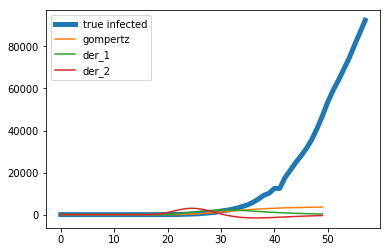

In [29]:
# Plot a single day
day_nr = 27
nr_days = 50
x = pd.Series(list(range(nr_days)))

row = country_df.iloc[day_nr]

infected = country_df['infected']
y = gompertz(x, row['a'],row['b'],row['c'])
y_der1 = gompertz_der1(x, row['a'],row['b'],row['c'])
y_der2 = gompertz_der2(x, row['a'],row['b'],row['c'])

plt.plot(country_df['numbered_date'],infected,linewidth=5, label = 'true infected')
plt.plot(x, y, label = 'gompertz')
plt.plot(x,y_der1, label = 'der_1')
plt.plot(x,y_der2, label = 'der_2')
plt.legend()
plt.show()


In [85]:
country_df

date      country     infected  deaths  recovered  delta_recover  \
0  2020-01-22  South Korea          NaN     0.0        0.0            0.0   
1  2020-01-23  South Korea          NaN     0.0        0.0            0.0   
2  2020-01-24  South Korea          NaN     0.0        0.0            0.0   
3  2020-01-25  South Korea          NaN     0.0        0.0            0.0   
4  2020-01-26  South Korea          NaN     0.0        0.0            0.0   
5  2020-01-27  South Korea          NaN     0.0        0.0            0.0   
6  2020-01-28  South Korea          NaN     0.0        0.0            0.0   
7  2020-01-29  South Korea     2.428571     0.0        0.0            0.0   
8  2020-01-30  South Korea     2.857143     0.0        0.0            0.0   
9  2020-01-31  South Korea     3.285714     0.0        0.0            0.0   
10 2020-02-01  South Korea     4.571429     0.0        0.0            0.0   
11 2020-02-02  South Korea     6.000000     0.0        0.0            0.0   
12 2020-02-03  South Korea     7.714286     0.0        0.0            0.0   
13 2020-02-04  South Korea     9.285714     0.0        0.0            0.0   
14 2020-02-05  South Korea    11.000000     0.0        0.0            0.0   
15 2020-02-06  South Korea    13.142857     0.0        0.0            0.0   
16 2020-02-07  South Korea    15.857143     0.0        1.0            1.0   
17 2020-02-08  South Korea    17.714286     0.0        1.0            0.0   
18 2020-02-09  South Korea    19.428571     0.0        3.0            2.0   
19 2020-02-10  South Korea    20.857143     0.0        3.0            0.0   
20 2020-02-11  South Korea    22.571429     0.0        3.0            0.0   
21 2020-02-12  South Korea    24.285714     0.0        7.0            4.0   
22 2020-02-13  South Korea    25.571429     0.0        7.0            0.0   
23 2020-02-14  South Korea    26.285714     0.0        7.0            0.0   
24 2020-02-15  South Korea    26.857143     0.0        9.0            2.0   
25 2020-02-16  South Korea    27.428571     0.0        9.0            0.0   
26 2020-02-17  South Korea    28.000000     0.0       10.0            1.0   
27 2020-02-18  South Korea    28.428571     0.0       12.0            2.0   
28 2020-02-19  South Korea    28.857143     0.0       12.0            0.0   
29 2020-02-20  South Korea    29.285714     1.0       16.0            4.0   
30 2020-02-21  South Korea    40.142857     2.0       16.0            0.0   
31 2020-02-22  South Korea    65.285714     2.0       16.0            0.0   
32 2020-02-23  South Korea   123.142857     6.0       18.0            2.0   
33 2020-02-24  South Korea   205.000000     8.0       18.0            0.0   
34 2020-02-25  South Korea   319.714286    10.0       22.0            4.0   
35 2020-02-26  South Korea   454.857143    12.0       22.0            0.0   
36 2020-02-27  South Korea   630.571429    13.0       22.0            0.0   
37 2020-02-28  South Korea   868.000000    13.0       22.0            0.0   
38 2020-02-29  South Korea  1172.714286    16.0       27.0            5.0   
39 2020-03-01  South Korea  1560.857143    17.0       30.0            3.0   
40 2020-03-02  South Korea  2008.571429    28.0       30.0            0.0   
41 2020-03-03  South Korea  2508.857143    28.0       30.0            0.0   
42 2020-03-04  South Korea  3110.142857    35.0       41.0           11.0   
43 2020-03-05  South Korea  3733.000000    35.0       41.0            0.0   
44 2020-03-06  South Korea  4350.428571    42.0      135.0           94.0   
45 2020-03-07  South Korea  4958.428571    44.0      135.0            0.0   
46 2020-03-08  South Korea  5514.285714    50.0      118.0          -17.0   
47 2020-03-09  South Korea  6025.428571    53.0      118.0            0.0   

    numbered_date  
0               0  
1               1  
2               2  
3               3  
4               4  
5               5  
6               6  
7               7  
8               8  
9               9  
10             